In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("VCA.xls")

In [ ]:
df.head()

,Service_Record_ID,Vehicle_ID,Vehicle_Type,Region,Service_Date,Service_Year,Service_Month,Service_Type,Service_Cost_USD,Odometer_Reading_KM,Downtime_Days,Service_Hours,Part_Replaced,Service_Vendor,Technician_Experience_Level,Vehicle_Purchase_Year,Vehicle_Age,Under_Warranty,Service_Outcome,Issue_Severity
0,SR0000001,VEH00655,Electric Sedan,North,2022-01-31,2022,1,Preventive,274.84,107743,2,5.9,Tires,Lucid Partner,Mid-Level,2018,4,No,Resolved,Low
1,SR0000002,VEH00143,Test Prototype,North,2019-12-23,2019,12,Repair,958.52,34386,1,2.6,Battery,3rd Party Vendor B,Mid-Level,2017,2,Yes,Resolved,Low
2,SR0000003,VEH00033,Electric Sedan,North,2021-06-14,2021,6,Preventive,282.38,70779,2,2.7,Tires,3rd Party Vendor A,Junior,2022,0,Yes,Resolved,Low
3,SR0000004,VEH00617,Electric Sedan,South,2023-09-15,2023,9,Preventive,326.15,33284,1,7.2,NaN,Lucid Partner,Senior,2018,5,No,Resolved,Low
4,SR0000005,VEH00604,Electric Van,North,2020-10-15,2020,10,Repair,929.75,9371,2,5.4,Transmission,Lucid Partner,Mid-Level,2017,3,Yes,Resolved,Medium


In [ ]:
df.describe()

,Service_Date,Service_Year,Service_Month,Service_Cost_USD,Odometer_Reading_KM,Downtime_Days,Service_Hours,Vehicle_Purchase_Year,Vehicle_Age
count,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2021-12-28 16:31:43.680000256,2021.492100,6.528940,496.107904,77467.013380,2.007660,3.999958,2018.508460,3.191640
min,2019-01-01 00:00:00,2019.000000,1.000000,0.000000,5003.000000,0.000000,0.500000,2015.000000,0.000000
25%,2020-06-29 00:00:00,2020.000000,4.000000,208.400000,41097.000000,1.000000,3.000000,2017.000000,1.000000
50%,2021-12-25 00:00:00,2021.000000,7.000000,275.060000,77656.500000,2.000000,4.000000,2019.000000,3.000000
75%,2023-07-03 00:00:00,2023.000000,10.000000,826.465000,113655.000000,3.000000,5.000000,2020.000000,5.000000
max,2024-12-30 00:00:00,2024.000000,12.000000,2177.870000,149997.000000,10.000000,11.300000,2022.000000,9.000000
std,NaN,1.705238,3.448524,411.875441,41902.208127,1.419437,1.485857,2.285466,2.531846


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Service_Record_ID            50000 non-null  object        
 1   Vehicle_ID                   50000 non-null  object        
 2   Vehicle_Type                 50000 non-null  object        
 3   Region                       50000 non-null  object        
 4   Service_Date                 50000 non-null  datetime64[ns]
 5   Service_Year                 50000 non-null  int64         
 6   Service_Month                50000 non-null  int64         
 7   Service_Type                 50000 non-null  object        
 8   Service_Cost_USD             50000 non-null  float64       
 9   Odometer_Reading_KM          50000 non-null  int64         
 10  Downtime_Days                50000 non-null  int64         
 11  Service_Hours                50000 non-nu

In [ ]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Service_Record_ID                  0
Vehicle_ID                         0
Vehicle_Type                       0
Region                             0
Service_Date                       0
Service_Year                       0
Service_Month                      0
Service_Type                       0
Service_Cost_USD                   0
Odometer_Reading_KM                0
Downtime_Days                      0
Service_Hours                      0
Part_Replaced                  20023
Service_Vendor                     0
Technician_Experience_Level        0
Vehicle_Purchase_Year              0
Vehicle_Age                        0
Under_Warranty                     0
Service_Outcome                    0
Issue_Severity                     0
dtype: int64


In [ ]:
df['Service_Date'] = pd.to_datetime(df['Service_Date'])

print(df['Service_Date'].dtype)


datetime64[ns]


# Total Maintenance Cost by Year

In [ ]:
yearly_cost = df.groupby('Service_Year')['Service_Cost_USD'].sum().reset_index()


/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_93380/3201128640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Service_Year', y='Service_Cost_USD', data=yearly_cost, palette='Blues_d')


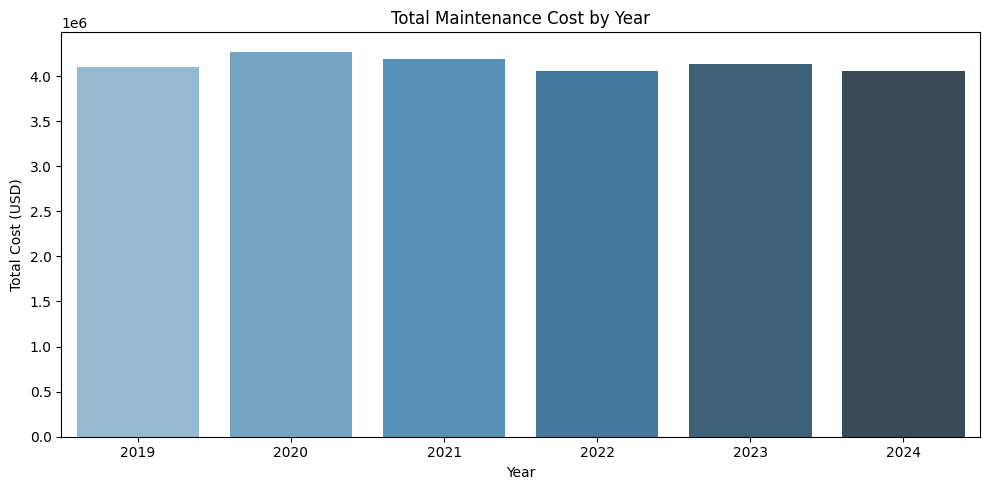

In [ ]:
# Plot it
plt.figure(figsize=(10,5))
sns.barplot(x='Service_Year', y='Service_Cost_USD', data=yearly_cost, palette='Blues_d')
plt.title("Total Maintenance Cost by Year")
plt.xlabel("Year")
plt.ylabel("Total Cost (USD)")
plt.tight_layout()
plt.show()

# Total Maintenance Cost by Service Type

In [ ]:
# Group by Service_Type and sum the cost
service_type_cost = df.groupby('Service_Type')['Service_Cost_USD'].sum().reset_index()



In [ ]:

# Sort by cost (descending)
service_type_cost = service_type_cost.sort_values(by='Service_Cost_USD', ascending=False)

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_93380/4281432840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Service_Type', y='Service_Cost_USD', data=service_type_cost, palette='Set2')


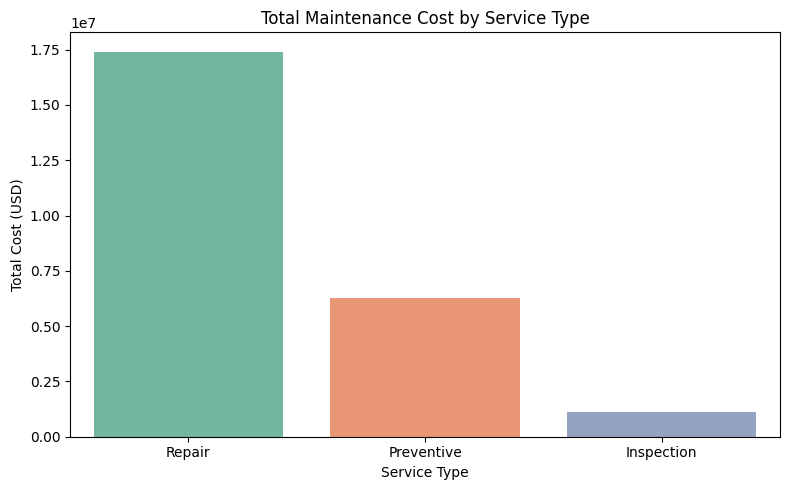

,Service_Type,Service_Cost_USD
2,Repair,17409786.84
1,Preventive,6267487.74
0,Inspection,1128120.63


In [ ]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Service_Type', y='Service_Cost_USD', data=service_type_cost, palette='Set2')
plt.title("Total Maintenance Cost by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Total Cost (USD)")
plt.tight_layout()
plt.show()

# Print the table
service_type_cost

# Total Maintenance Cost by Region

In [ ]:
# Group by Region and sum Service Cost
region_cost = df.groupby('Region')['Service_Cost_USD'].sum().reset_index()


In [ ]:
# Sort by cost (descending)
region_cost = region_cost.sort_values(by='Service_Cost_USD', ascending=False)

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_93380/1946861315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Region', y='Service_Cost_USD', data=region_cost, palette='coolwarm')


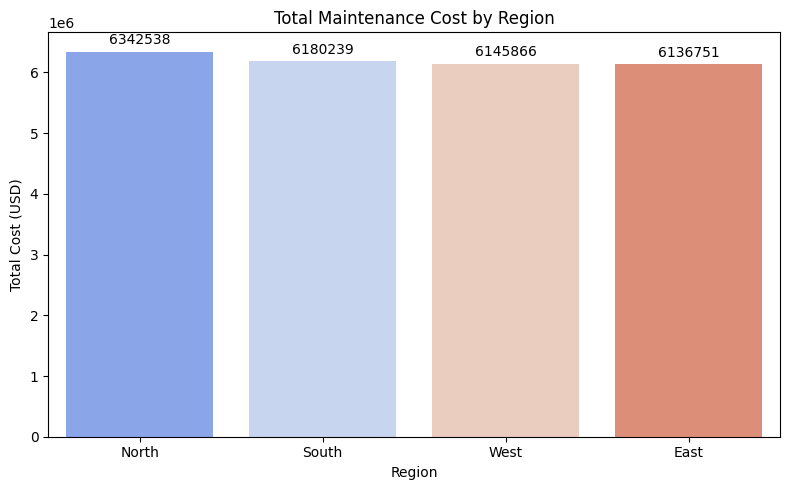

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='Region', y='Service_Cost_USD', data=region_cost, palette='coolwarm')

# Add labels on bars
for i in barplot.containers:
    barplot.bar_label(i, fmt='%.0f', label_type='edge', fontsize=10, color='black', padding=3)

plt.title("Total Maintenance Cost by Region")
plt.xlabel("Region")
plt.ylabel("Total Cost (USD)")
plt.tight_layout()
plt.show()

# Top 10 most expensive Vehicles (Total Service Cost)

In [ ]:
# Group by Vehicle_ID
top_vehicles = df.groupby('Vehicle_ID')['Service_Cost_USD'].sum().reset_index()

In [ ]:
# Sort and keep top 10
top_vehicles = top_vehicles.sort_values(by='Service_Cost_USD', ascending=False).head(10)

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_93380/2662536318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Service_Cost_USD', y='Vehicle_ID', data=top_vehicles, palette='Reds_r')


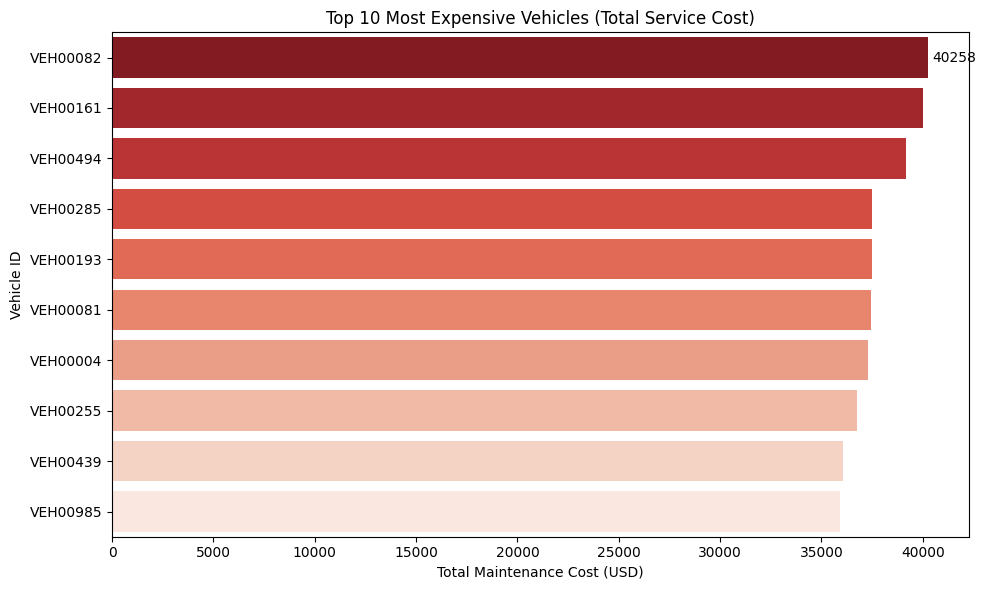

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Service_Cost_USD', y='Vehicle_ID', data=top_vehicles, palette='Reds_r')

# Add labels
barplot.bar_label(barplot.containers[0], fmt='%.0f', padding=3)

plt.title("Top 10 Most Expensive Vehicles (Total Service Cost)")
plt.xlabel("Total Maintenance Cost (USD)")
plt.ylabel("Vehicle ID")
plt.tight_layout()
plt.show()

# Maintenance Cost by Warranty Status

In [ ]:
# Group by warranty status
warranty_cost = df.groupby('Under_Warranty')['Service_Cost_USD'].sum().reset_index()

In [ ]:

# Sort so "No" comes after "Yes" for readability
warranty_cost = warranty_cost.sort_values(by='Service_Cost_USD', ascending=False)

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_93380/1605888113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Under_Warranty', y='Service_Cost_USD', data=warranty_cost, palette='Set1')


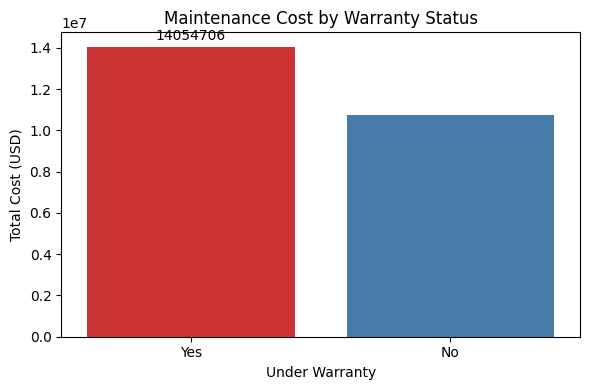

,Under_Warranty,Service_Cost_USD
1,Yes,14054706.50
0,No,10750688.71


In [ ]:
# Plot
plt.figure(figsize=(6, 4))
barplot = sns.barplot(x='Under_Warranty', y='Service_Cost_USD', data=warranty_cost, palette='Set1')

# Add labels
barplot.bar_label(barplot.containers[0], fmt='%.0f', padding=3)

plt.title("Maintenance Cost by Warranty Status")
plt.xlabel("Under Warranty")
plt.ylabel("Total Cost (USD)")
plt.tight_layout()
plt.show()

# Display table for confirmation
warranty_cost

# Maintenance Cost by Parts Replaced

In [ ]:
# Group by part replaced
part_cost = df.groupby('Part_Replaced')['Service_Cost_USD'].sum().reset_index()


In [ ]:
# Sort descending
part_cost = part_cost.sort_values(by='Service_Cost_USD', ascending=False)

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_93380/3079163717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Service_Cost_USD', y='Part_Replaced', data=part_cost, palette='viridis')


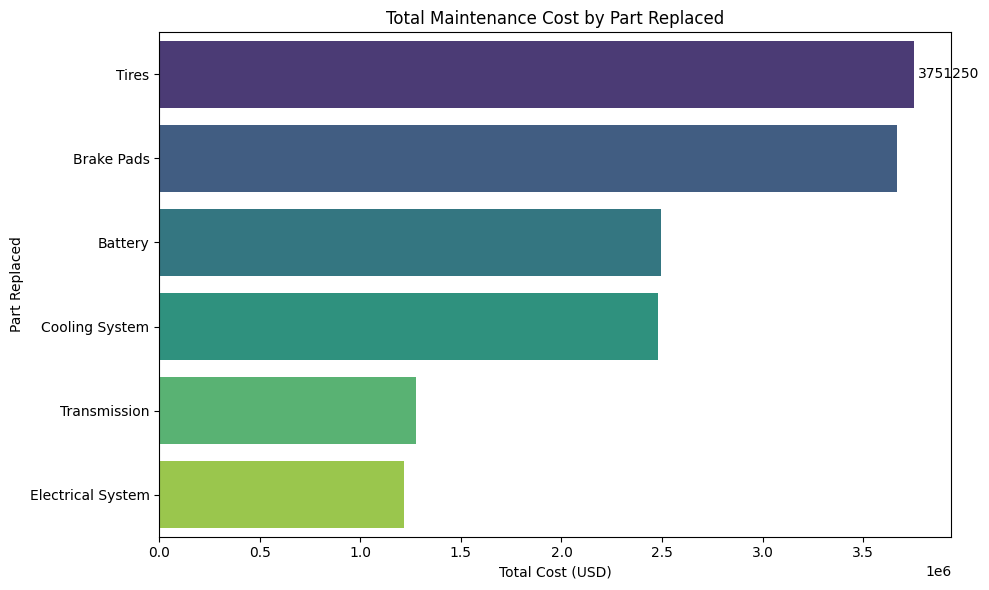

,Part_Replaced,Service_Cost_USD
4,Tires,3751249.86
1,Brake Pads,3667361.43
0,Battery,2494989.01
2,Cooling System,2481063.50
5,Transmission,1276444.05
3,Electrical System,1216523.47


In [ ]:
# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Service_Cost_USD', y='Part_Replaced', data=part_cost, palette='viridis')

# Add labels
barplot.bar_label(barplot.containers[0], fmt='%.0f', padding=3)

plt.title("Total Maintenance Cost by Part Replaced")
plt.xlabel("Total Cost (USD)")
plt.ylabel("Part Replaced")
plt.tight_layout()
plt.show()

# Show table for insight
part_cost

# Scikit Learn Modeling Plan

### Importing necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

### Preparing Data

In [ ]:
# Drop records with missing or invalid cost values just in case
df = df[df['Service_Cost_USD'] > 0].copy()

# Define features and target
features = [
    'Vehicle_Type', 'Region', 'Service_Type', 'Odometer_Reading_KM', 'Downtime_Days',
    'Service_Hours', 'Part_Replaced', 'Service_Vendor', 'Technician_Experience_Level',
    'Vehicle_Age', 'Under_Warranty', 'Issue_Severity'
]
target = 'Service_Cost_USD'

X = df[features]
y = df[target]


### Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Create preprocessing + Model pipelines

In [ ]:
# Separate categorical and numerical features
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number').columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keeps numerical columns
)

# Create the full pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


### Training Model

In [ ]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Vehicle_Type', 'Region',
                                                   'Service_Type',
                                                   'Part_Replaced',
                                                   'Service_Vendor',
                                                   'Technician_Experience_Level',
                                                   'Under_Warranty',
                                                   'Issue_Severity'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

### Evaluating Model

In [ ]:
y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): $109.02
R-squared (R²): 0.80


# Creating dataframe, getting feature importance, getting feature names

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_93380/622345995.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='mako')


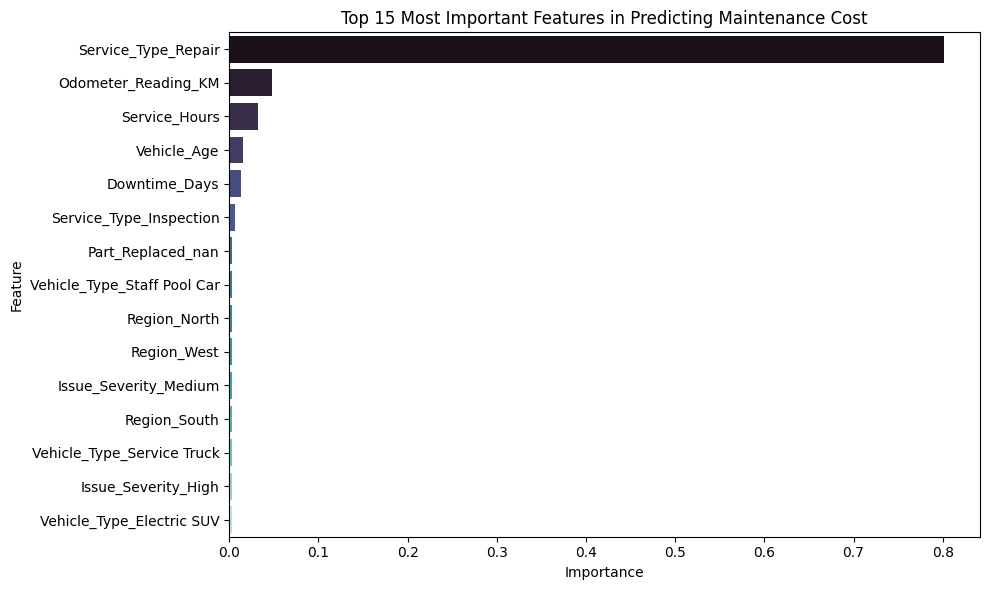

In [ ]:
# Get feature names (after OneHotEncoding)
encoded_feature_names = model_pipeline.named_steps['preprocessor'] \
    .transformers_[0][1] \
    .get_feature_names_out(categorical_cols).tolist() + numerical_cols

# Get feature importances
importances = model_pipeline.named_steps['regressor'].feature_importances_

# Create a DataFrame
feature_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='mako')
plt.title('Top 15 Most Important Features in Predicting Maintenance Cost')
plt.tight_layout()
plt.show()

# Risk Classifier – Will This Service Cost Over $1000?

In [ ]:
df['High_Cost'] = (df['Service_Cost_USD'] > 1000).astype(int)

### Creating target column

In [ ]:
# High cost = service over $1000
df['High_Cost'] = (df['Service_Cost_USD'] > 1000).astype(int)
df['High_Cost'].value_counts()


High_Cost
0    41248
1     8746
Name: count, dtype: int64

### Defining Featured and Target for Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

features = [
    'Vehicle_Type', 'Region', 'Service_Type', 'Odometer_Reading_KM', 'Downtime_Days',
    'Service_Hours', 'Part_Replaced', 'Service_Vendor', 'Technician_Experience_Level',
    'Vehicle_Age', 'Under_Warranty', 'Issue_Severity'
]
target = 'High_Cost'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


### Building the pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical = X.select_dtypes(include='object').columns.tolist()
numerical = X.select_dtypes(include='number').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ],
    remainder='passthrough'
)

clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


### Train and Evaluate CLassifier

In [ ]:
clf_pipeline.fit(X_train, y_train)
y_pred = clf_pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      8250
           1       0.52      0.49      0.51      1749

    accuracy                           0.83      9999
   macro avg       0.71      0.70      0.70      9999
weighted avg       0.83      0.83      0.83      9999

Confusion Matrix:
 [[7467  783]
 [ 893  856]]
